In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import matplotlib.gridspec as gridspec
plt.rc('font', family='NanumBarunGothic') 

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 27 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (17.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 129499 files and dir

#데이터 가져오기

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/국민건강영양조사데이터경진대회/nationalhealth_2010to2021.csv')
df.head()

,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,incm5,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,b'A308780901',b'A3087809',2010.0,1.0,1.0,1.0,74.0,3.0,2.0,4.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
1,b'A309099802',b'A3090998',2010.0,1.0,1.0,2.0,71.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,b'A309460901',b'A3094609',2010.0,1.0,1.0,2.0,61.0,3.0,2.0,4.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
3,b'A309460902',b'A3094609',2010.0,1.0,1.0,1.0,32.0,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,b'A310439801',b'A3104398',2010.0,1.0,1.0,2.0,63.0,4.0,4.0,5.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35629 entries, 0 to 35628
Columns: 122 entries, ID to 우울증
dtypes: float64(120), object(2)
memory usage: 33.2+ MB


ID            0
ID_fam        0
year          0
region        0
town_t        0
             ..
협심증또는심근경색증    0
천식            0
아토피피부염        0
골관절염          0
우울증           0
Length: 122, dtype: int64

In [6]:
df.columns.tolist()

['ID',
 'ID_fam',
 'year',
 'region',
 'town_t',
 'sex',
 'age',
 'incm',
 'ho_incm',
 'incm5',
 'ho_incm5',
 'edu',
 'occp',
 'cfam',
 'genertn',
 'allownc',
 'marri_1',
 'marri_2',
 'fam_rela',
 'tins',
 'D_1_1',
 'educ',
 'EC1_1',
 'EC_wht_23',
 'EC_wht_5',
 'EC_pedu_1',
 'EC_pedu_2',
 'BD1_11',
 'BD2_1',
 'BD2_31',
 'dr_month',
 'BP6_10',
 'BP7',
 'mh_stress',
 'BS3_1',
 'BE3_31',
 'BE5_1',
 'LW_mt',
 'LW_mt_a1',
 'LW_br',
 'HE_fst',
 'HE_HPdr',
 'HE_DMdr',
 'HE_mens',
 'HE_prg',
 'HE_HPfh1',
 'HE_HPfh2',
 'HE_HPfh3',
 'HE_HLfh1',
 'HE_HLfh2',
 'HE_HLfh3',
 'HE_IHDfh1',
 'HE_IHDfh2',
 'HE_IHDfh3',
 'HE_STRfh1',
 'HE_STRfh2',
 'HE_STRfh3',
 'HE_DMfh1',
 'HE_DMfh2',
 'HE_DMfh3',
 'HE_rPLS',
 'HE_sbp',
 'HE_dbp',
 'HE_ht',
 'HE_wt',
 'HE_wc',
 'HE_BMI',
 'HE_glu',
 'HE_HbA1c',
 'HE_chol',
 'HE_HDL_st2',
 'HE_TG',
 'HE_ast',
 'HE_alt',
 'HE_hepaB',
 'HE_HB',
 'HE_HCT',
 'HE_BUN',
 'HE_crea',
 'HE_WBC',
 'HE_RBC',
 'HE_Bplt',
 'HE_Uph',
 'HE_Unitr',
 'HE_Usg',
 'HE_Upro',
 'HE_Uglu',
 '

# 변수정리

In [7]:
# #EC 직업과 관련된 문항
# job_check = df['EC1_1','EC_wht_23','EC_wht_5','EC_pedu_1','EC_pedu_2']
# #BD 음주와 흡연과 관련된 
# drunk_check = df['BD1_11','BD2_1','BD2_31','dr_month','BS3_1']
# #BP 정신적 스트레스와 관련된 문항
# mental_stress = df['BP6_10','BP7','mh_stress']
# #BE 신체적 활동(운동)과 관련된 문항
# exercise = df['BE3_31','BE5_1']
# #LW 출산 여부와 관련된 문항
# childbirth_check = df['LW_mt','LW_mt_a1','LW_br']
# # # 개인아이디 가구아이디 조사연도 17개시도 동/읍면구분 성별 나이 소득분위 교육수준 
# # # incm과 관련된문항 소득분위
# # income_check = 
# # # HE와 관련된문항  #건강검진부분
# # phisical_check = 
# # #N과관련된 문항 #1일 영양소섭취와 관련된문항
# # nutrient_intake = 
# # #EC와 경제수준과 관련된문항


#년도 변화에 따른 신체/질병 특성의 변화

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text

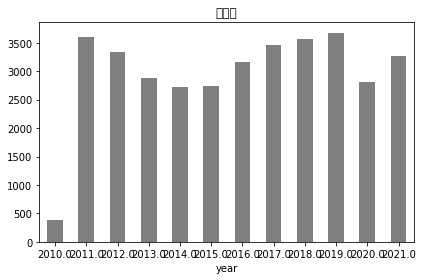

In [8]:
s = df.groupby('year').size()

s.plot(color='grey', kind='bar', rot=0)
plt.title("연도별")
plt.tight_layout()

가장 많은 연도: 2019, 2011    
가장 적은 연도: 2014, 2015

In [9]:
df.groupby('year').size()

year
2010.0     389
2011.0    3611
2012.0    3331
2013.0    2880
2014.0    2722
2015.0    2746
2016.0    3168
2017.0    3465
2018.0    3565
2019.0    3676
2020.0    2815
2021.0    3261
dtype: int64

2010년 데이터 제외

In [10]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    for i in range(2010, 2022):
      i = df[df['year']==i][feature].value_counts()
    data = pd.DataFrame([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
    data.index = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
    data.plot(kind='bar',stacked=True)

In [11]:
df.groupby('year')['비만'].size()

year
2010.0     389
2011.0    3611
2012.0    3331
2013.0    2880
2014.0    2722
2015.0    2746
2016.0    3168
2017.0    3465
2018.0    3565
2019.0    3676
2020.0    2815
2021.0    3261
Name: 비만, dtype: int64

In [12]:
df.groupby('year')['우울증'].value_counts()

year    우울증 
2010.0  -1.0     329
         0.0      48
         1.0      12
2011.0  -1.0    3023
         0.0     414
         1.0     174
2012.0  -1.0    2810
         0.0     367
         1.0     154
2013.0   0.0    2747
         1.0     133
2014.0   0.0    2561
         1.0     161
2015.0   0.0    2596
         1.0     150
2016.0   0.0    3009
         1.0     159
2017.0   0.0    3300
         1.0     165
2018.0   0.0    3404
         1.0     161
2019.0   0.0    3492
         1.0     184
2020.0   0.0    2654
         1.0     161
2021.0   0.0    3100
         1.0     161
Name: 우울증, dtype: int64

'고혈압',
 '당뇨병',
 '고콜레스테롤혈증',
 '고중성지방혈증',
 'B형간염',
 '빈혈',
 '뇌졸중',
 '협심증또는심근경색증'

In [13]:
df.groupby('year')['고혈압'].value_counts()

year    고혈압
2010.0  1.0     248
        0.0     141
2011.0  0.0    2265
        1.0    1346
2012.0  0.0    2072
        1.0    1259
2013.0  0.0    1884
        1.0     996
2014.0  0.0    1839
        1.0     883
2015.0  0.0    1718
        1.0    1028
2016.0  0.0    2014
        1.0    1154
2017.0  0.0    2224
        1.0    1241
2018.0  0.0    2224
        1.0    1341
2019.0  0.0    2330
        1.0    1346
2020.0  0.0    1796
        1.0    1019
2021.0  0.0    2009
        1.0    1252
Name: 고혈압, dtype: int64

In [14]:
stress = df.groupby('year')['mh_stress'].value_counts()

#질병에 걸린 사람만 비교

In [15]:
disease = ['비만','고혈압','당뇨병','고콜레스테롤혈증','고중성지방혈증','B형간염','빈혈','뇌졸중','협심증또는심근경색증','천식','아토피피부염','골관절염','우울증']
for i in range(len(disease)):
  df.loc[(df[disease[i]]==1), i]= disease[i]


In [16]:
for i in range(len(disease)):
  print(disease[i])

비만
고혈압
당뇨병
고콜레스테롤혈증
고중성지방혈증
B형간염
빈혈
뇌졸중
협심증또는심근경색증
천식
아토피피부염
골관절염
우울증


In [51]:
#2010년일때

df_2010_disease = df.query("year == 2010")[disease]

df_2010_disease_a = df_2010_disease.query("비만 == 1")
df_2010_disease_a_len = len(df_2010_disease_a) #비만개수
print(df_2010_disease_a_len)

df_2010_disease_b = df_2010_disease.query("고혈압 == 1")
df_2010_disease_b_len = len(df_2010_disease_b) #비만개수
df_2010_disease_b_len




# df_2010_disease = df.query("year == 2010")[disease]
# df_2010_disease_a = df_2010_disease.query("비만 == 1")
# df_2010_disease_a_len = len(df_2010_disease_a) #비만개수
# y.append(df_2010_disease_a_len)


172


248

172
248
386
111
107
9
46
18
28
17
2
85
12


<BarContainer object of 13 artists>

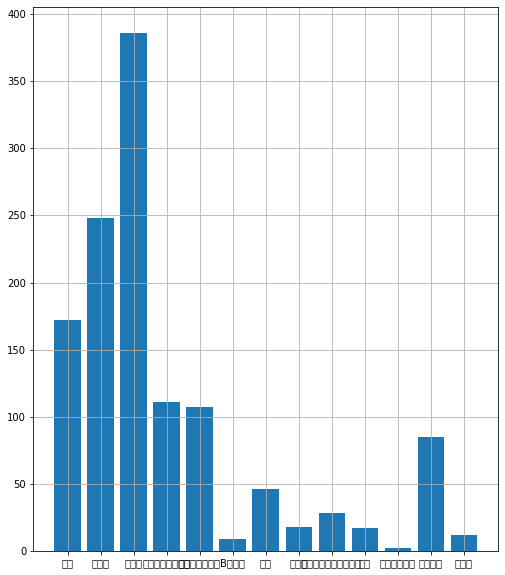

In [61]:
#2010년일때

df_2010_disease = df.query("year == 2010")[disease]
x = disease
y = []
for i in disease:
  df_2010_disease_a = df_2010_disease[df_2010_disease[i] == 1]
  df_2010_disease_a_len = len(df_2010_disease_a) #비만개수
  print(df_2010_disease_a_len)
  y.append(df_2010_disease_a_len)

grid = gridspec.GridSpec(1,2)#그래프를 그릴 도화지 개수
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace= 0.4, hspace=0.5) #그래프 간의 거리 조절

ax0 = plt.subplot(grid[0])
ax2.set_title("health_50y")
ax0.bar(x,y)
_=ax0.set_xticklabels(disease, rotation=90)
  


<BarContainer object of 13 artists>

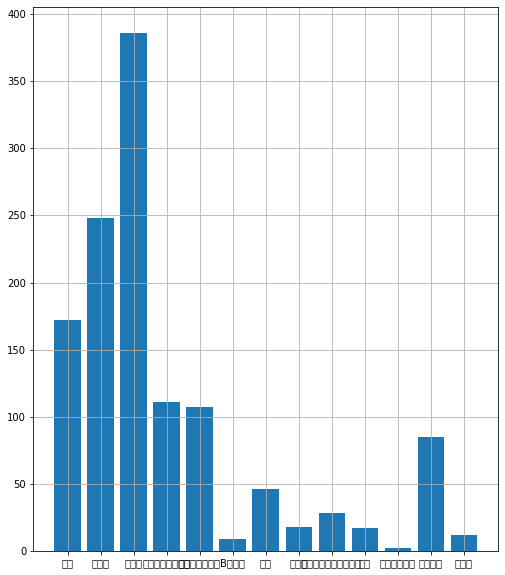

In [60]:


# df.groupby('age')[disease]

[172, 248, 386, 111, 107, 9, 46, 18, 28, 17, 2, 85, 12]

In [49]:
df_2010_disease. query("고혈압 == 1")

,비만,고혈압,당뇨병,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
6,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
8,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0
385,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
386,1.0,1.0,1.0,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
387,1.0,1.0,1.0,1.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [47]:
df_2010_disease_b

,비만,고혈압,당뇨병,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증


In [32]:
df_2010_disease_a = df_2010_disease.query("비만 == 1")

In [35]:
df_2010_disease_a_len = len(df_2010_disease_a) #비만개수

,비만,고혈압,당뇨병,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
8,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
9,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
381,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
386,1.0,1.0,1.0,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
387,1.0,1.0,1.0,1.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [34]:
len(df_2010_disease_a)

172

TypeError: ignored

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0, flags=flags)


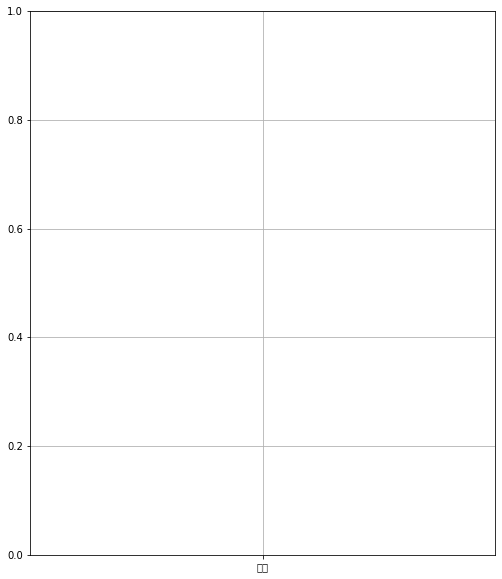

In [26]:
grid = gridspec.GridSpec(1,2)#그래프를 그릴 도화지 개수
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace= 0.4, hspace=0.5) #그래프 간의 거리 조절

ax0 = plt.subplot(grid[0])
ax0.bar(x,y)

df.groupby('age')[disease]

In [ ]:
for i in range(len(disease)):
  bar_chart(disease[i])

#지역별 질병/신체 특징

In [ ]:
df.groupby('region').size()

In [ ]:
region = df.groupby('region').size()

region.plot(color='grey', kind='bar', rot=0)
plt.hlines(y=1900, xmin = 0, xmax = 17.5, color='red', linestyle='dotted')
plt.title("지역별")
plt.tight_layout()

환자 수가 많은 지역: 서울>경기>세종>부산>인천

In [ ]:
df[df['region']==9]['occp'].value_counts() #경기도 직업 유형

서울 : 무직 > 관리자 > 사무직 > 서비스업 

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['axes.grid'] = True 
disease = ['비만','고혈압','당뇨병','고콜레스테롤혈증','고중성지방혈증','B형간염','빈혈','뇌졸중','협심증또는심근경색증','천식','아토피피부염','골관절염','우울증']

def bar_chart(feature):
    for i in range(1, 18):
      i = df[df[i]==1][feature].value_counts()
    data = pd.DataFrame([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
    data.index = ['비만','고혈압','당뇨병','고콜레스테롤혈증','고중성지방혈증','B형간염','빈혈','뇌졸중','협심증또는심근경색증','천식','아토피피부염','골관절염','우울증']
    #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
    data.plot(kind='bar',stacked=True)

In [ ]:
df.groupby('region')['비만'].value_counts()

In [ ]:
disease = ['비만','고혈압','당뇨병','고콜레스테롤혈증','고중성지방혈증','B형간염','빈혈','뇌졸중','협심증또는심근경색증','천식','아토피피부염','골관절염','우울증']
bar_chart('region')

#나이에 따른 신체/질병 관련 특성'

연령: 30대부터 80대까지 

In [ ]:
print("나이 평균",df['age'].mean())
print("최소값",df['age'].min())
print("최대값",df['age'].max())

In [ ]:
df.loc[(df['age']<40)&(df['age']>=30), 'age']=1
df.loc[(df['age']<50)&(df['age']>=40), 'age']=2
df.loc[(df['age']<60)&(df['age']>=50), 'age']=3
df.loc[(df['age']<70)&(df['age']>=60), 'age']=4
df.loc[(df['age']<=80)&(df['age']>=70), 'age']=5

In [ ]:
age = df.groupby('age').size()

age.plot(color='grey', kind='bar', rot=0)
plt.title("나이별")
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    thirty = df[df['age']==1][feature].value_counts()
    fourty = df[df['age']==2][feature].value_counts()
    fifty = df[df['age']==3][feature].value_counts()
    sixty = df[df['age']==4][feature].value_counts()
    seventy = df[df['age']==5][feature].value_counts()
    data = pd.DataFrame([thirty, fourty, fifty, sixty, seventy])
    data.index = ['thirty', 'fourty', 'fifty', 'sixty', 'seventy']
    data.plot(kind='bar',stacked=True)

In [ ]:
bar_chart('BP6_10') #자살을 생각해 본 여부

In [ ]:
bar_chart('mh_stress')

60대,50대 스트레스 인지율이 더 높지만 상대적으로 스트레스를 더 많이 받는 연령대는 30,40,50대입니다.

In [ ]:
bar_chart('D_1_1') #주관적 건강인지

60대 이후로 건강이 나쁘다고 인지한 비율이 높음       
50대부터 건강이 안좋다는 주관적 인지가 늘어나고 있음

In [ ]:
bar_chart('EC1_1')

50대까지는 취업자 비율이 높음

In [ ]:
bar_chart('marri_2') #결혼상태

70대부터 사별비율이 높아지면서 배우자 비율은 줄었음.

In [ ]:
disease = ['비만','고혈압','당뇨병','고콜레스테롤혈증','고중성지방혈증','B형간염','빈혈','뇌졸중','협심증또는심근경색증','천식','아토피피부염','골관절염','우울증']
for i in range(len(disease)):
  bar_chart(disease[i])
  plt.title(disease[i])

비만: 60대가 1등       
당뇨병, 고혈압 : 70대 > 60대         
고콜레스테롤혈증: 60대> 70대 = 50대         
고지방혈증 : 50대 , 60대            
B형 간염은 비율이 무척 낮음         
빈혈: 70대 1등, 40대 2등  
뇌졸중 : 70대, 60대가 가장 높음         
협심증 및 심근경색증 : 60대, 70대가 가장 높음        
천식 :70대가 1등         
아토피피부염: 30대
골관절염: 70대 > 60대 > 50대       
우울증 : 50대, 60대, 70대 비슷하게 높음


#성별에 따른 신체/질병 관련 특성

In [ ]:
sex = df.groupby('sex').size()

sex.plot(color='grey', kind='bar', rot=0)
plt.title("성별")
plt.tight_layout()

In [ ]:
men = df[df['sex']==1]['sex']
men.value_counts()

In [ ]:
men = df[df['sex']==1]['year']
men.value_counts()

In [ ]:
women = df[df['sex']==2]['year']
women.value_counts()

남성과 여성의 차이:
2021년에는 남성들의 발병률이 여성보다 높았음

In [ ]:
men.value_counts().index

In [ ]:
df.groupby('우울증').size()

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    men = df[df['sex']==1][feature].value_counts()
    women = df[df['sex']==2][feature].value_counts()
    data = pd.DataFrame([men, women])
    data.index = ['men','women']
    data.plot(kind='bar',stacked=True)

In [ ]:
bar_chart('mh_stress')
bar_chart('우울증')

여성이 남성보다 스트레스 인지율, 우울증이 더 높습니다.

In [ ]:
bar_chart('BD1_11') #일년간 음주빈도

주 3,4회 이상 마시는 비율은 남성이 더 높습니다.

In [ ]:
bar_chart('EC_wht_5')
bar_chart('EC1_1')

비경제활동, 실업자인 여성이 더 많음

In [ ]:
disease = ['비만','고혈압','당뇨병','고콜레스테롤혈증','고중성지방혈증','B형간염','빈혈','뇌졸중','협심증또는심근경색증','천식','아토피피부염','골관절염','우울증']
for i in range(len(disease)):
  bar_chart(disease[i])
  plt.title(disease[i])

남성이 고중성지방혈증이 높음.           
여성은 골관절염, 우울증 비중이 높음.

##고혈압이 가족력과 관련성 알아보기
hypertension :고혈압

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    dad = df[df['HE_HPfh1']==1][feature].value_counts()
    mom = df[df['HE_HPfh2']==1][feature].value_counts()
    bro = df[df['HE_HPfh3']==1][feature].value_counts()
    
    data = pd.DataFrame([dad, mom, bro])
    data.index = ['dad', 'mom', 'bro']
    data.plot(kind='bar',stacked=True)
    

In [ ]:
bar_chart('고혈압')

고혈압 가족력은 어머니의 영향이 가장 크다.           
어머니 > 아버지 > 형재자매

##고지혈증이 가족력과 연관성 알아보기

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    dad = df[df['HE_HLfh1']==1][feature].value_counts()
    mom = df[df['HE_HLfh2']==1][feature].value_counts()
    bro = df[df['HE_HLfh3']==1][feature].value_counts()
    
    data = pd.DataFrame([dad, mom, bro])
    data.index = ['dad', 'mom', 'bro']
    data.plot(kind='bar',stacked=True)

In [ ]:
bar_chart('고중성지방혈증')

어머니> 형재자매> 아버지

##허혈성 심장질환
허혈성 심질환은 혈액 공급에 장애를 일으키는 심장 질환을 말합니다.

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    dad = df[(df['HE_IHDfh1']==1)][feature].value_counts()
    mom = df[df['HE_IHDfh2']==1][feature].value_counts()
    bro = df[df['HE_IHDfh3']==1][feature].value_counts()
    
    data = pd.DataFrame([dad, mom, bro])
    data.index = ['dad', 'mom', 'bro']
    data.plot(kind='bar',stacked=True)

In [ ]:
bar_chart('협심증또는심근경색증')

아버지 > 어머니 > 형재자매

##뇌졸중 상관관계
환자의 혈액 상태, 당뇨 여부, 심장, 신장

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    dad = df[df['HE_STRfh1']==1][feature].value_counts()
    mom = df[df['HE_STRfh2']==1][feature].value_counts()
    bro = df[df['HE_STRfh3']==1][feature].value_counts()
    
    data = pd.DataFrame([dad, mom, bro])
    data.index = ['dad', 'mom', 'bro']
    data.plot(kind='bar',stacked=True)

In [ ]:
bar_chart('뇌졸중')

##당뇨병 상관관계 알아보기

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    dad = df[df['HE_DMfh1']==1][feature].value_counts()
    mom = df[df['HE_DMfh2']==1][feature].value_counts()
    bro = df[df['HE_DMfh3']==1][feature].value_counts()
    
    data = pd.DataFrame([dad, mom, bro])
    data.index = ['dad', 'mom', 'bro']
    data.plot(kind='bar',stacked=True)

In [ ]:
bar_chart('당뇨병')

어머니 > 형재자매 > 아버지

가족력이 있는 사람과 가족력이 없는 사람 중에서 자신이 그 병에 걸린 확률

##소득분위와 자살률의 관계

##비만과 당뇨병, 당뇨, 중성지방량 등 관계 알아보기

In [ ]:
df.groupby('N_INTK').mean()  #식품섭취량

#주제 정하기